# Branching algorithms

## 1. Vertex Cover

### a) Vertex Cover algorithm 

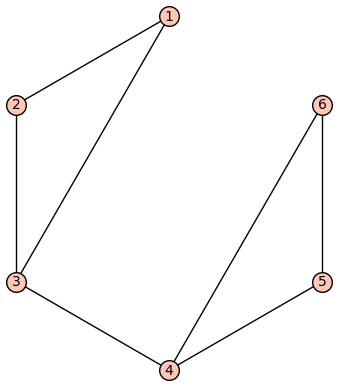

Found a vertex cover: {1, 2, 4, 5}


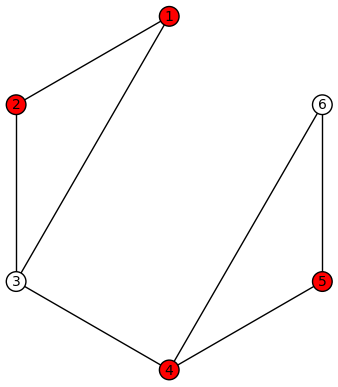

{1, 2, 4, 5}

In [39]:
# the function takes in three parameters
# G: the input graph
# k: remaining budget
# cover: default as empty but will change if there is a provided non-empty set
def vertex_cover_recursive(G, k, cover=set()):
    # see if there is any edge that is not covered
    uncovered_edges = [e for e in G.edges(labels=False) if not (e[0] in cover or e[1] in cover)]
    if not uncovered_edges:
        return cover  # return current vertex cover
    if k <= 0:
        return None  # run out of budget but there still are edges left
    # select an edge from E
    u, v = uncovered_edges[0]
    # add u into vertex cover and go on
    cover_with_u = vertex_cover_recursive(G, k - 1, cover.union({u}))
    if cover_with_u is not None:
        return cover_with_u
    # add v into vertex cover and go on
    cover_with_v = vertex_cover_recursive(G, k - 1, cover.union({v}))
    if cover_with_v is not None:
        return cover_with_v
    # return no if u and v are both not valid vertex
    return None

def vertex_cover(G, k):
    # starting with empty vertex cover
    cover = vertex_cover_recursive(G, k)
    if cover is not None:
        print("Found a vertex cover:", cover)
        # mark the vertices in VC in red and other vertices in white
        vertex_colors = {'red': list(cover), 'white': [v for v in G.vertices() if v not in cover]}
        # plot the resulting graph
        G.show(vertex_colors=vertex_colors, layout='circular')
        return cover
    else:
        print("No vertex cover found with", k, "vertices")
        return None

# create a graph
# G = graphs.PetersenGraph()
G = Graph([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4)])
# show(G, layout='circular')
G.show(layout='circular')
# try the algorithm with created G and k=4
vertex_cover(G, 4)

### b) Simplification Rules for Vertex Cover

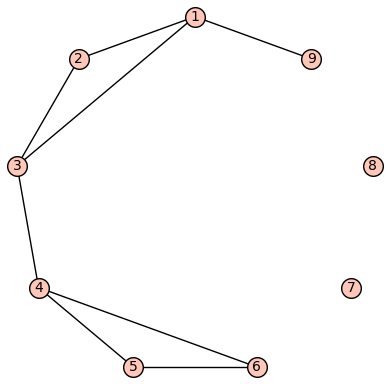

In [40]:
# define edges and nodes
vertices = [1, 2, 3, 4, 5, 6, 7, 8]  # including nodes of 0 degree(7 & 8)
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4), (1, 9)]

# create the graph
G = Graph([vertices, edges])
# G = Graph([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4)])

# define a budget k
k = 5

# show the graph
G.show(layout='circular')
# plot(G)

# obtain all vertices with degree-3
# degree_of_3 = G.degree(3)

# show degree for each node starting from node 0
# all_degrees = G.degree()

### (Degree-0)
#### If ∃v ∈ V such that dG(v) = 0, then set G ← G − v

Vertices of degree 0: [7, 8]


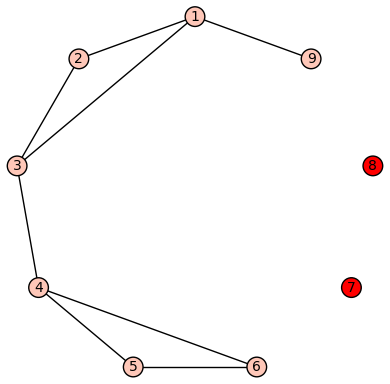

In [41]:
# obtain all vertices with degree-0
degree_of_0 = [v for v in G.vertices() if G.degree(v) == 0]
print("Vertices of degree 0:", degree_of_0)

# mark nodes with degree 0 with color red
vertex_colors = {'red': degree_of_0}

# show the result G
G.show(vertex_colors=vertex_colors, layout='circular')

Graph after deleting degree-0 vertices


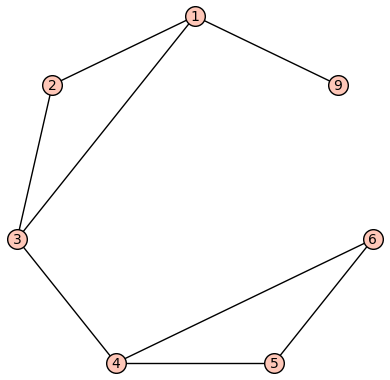

In [42]:
# delete nodes with degree 0
G.delete_vertices(degree_of_0)

print("Graph after deleting degree-0 vertices")

# show the new graph
G.show(layout='circular')

### (Degree-1)
#### If ∃v ∈ V such that dG(v) = 1, then set G ← G − NG[v] and k ← k − 1

Vertices of degree 1(in red): [9]
Their neighbors(in blue): [1]


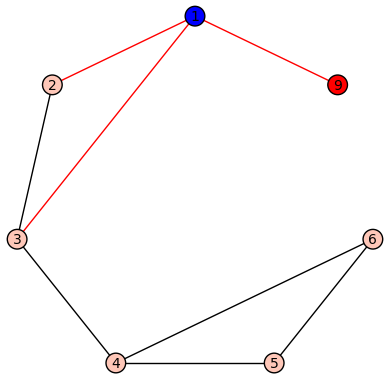

In [43]:
# obtain all vertices with degree-1
degree_of_1 = [v for v in G.vertices() if G.degree(v) == 1]

# and their neighbors
neighbor_vertex = []
for vertex in degree_of_1:
    neighbor_vertex.append(G.neighbors(vertex)[0])
    
# mark nodes with degree 1 with color red 
# mark neighbor of nodes with degree 1 with color blue
vertex_colors = {'red': degree_of_1, 'blue': neighbor_vertex}

# find all edges connected to the neighbor vertices and mark them red
neighbor_edges = [(u, v) for u, v in edges if u in neighbor_vertex or v in neighbor_vertex]
    
edge_colors = {'red': neighbor_edges}

print("Vertices of degree 1(in red):", degree_of_1)
print("Their neighbors(in blue):", neighbor_vertex)

# show the result G
G.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='circular')

k before delete 5
k after delete 4


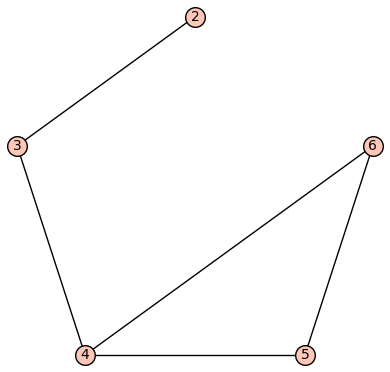

In [44]:
# delete nodes with degree 1
G.delete_vertices(degree_of_1)
# and their beighbor
G.delete_vertices(neighbor_vertex)

print("k before delete", k)
k = k - len(degree_of_1)
print("k after delete", k)

# show the new graph
G.show(layout='circular')

### (Large Degree)
#### If ∃v ∈ V such that dG(v) > k, then set G ← G − v and k ← k − 1.

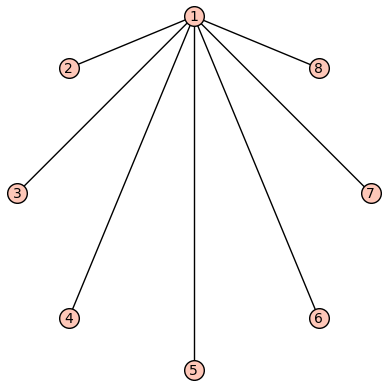

Number of Vertex: 8
Number of Edges: 7
Cuurrent k: 5


In [45]:
# define edges and nodes
vertices = [1, 2, 3, 4, 5, 6, 7, 8]  # including nodes of 0 degree(7 & 8)
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8)]

# create the graph
G = Graph([vertices, edges])

k = 5

G.show(layout='circular')

all_degrees = G.degree()
print("Number of Vertex:", len(vertices))
print("Number of Edges:", G.size())
print("Cuurrent k:", k)

### (Number of Edges)
#### If dG(v) ≤ k for each v ∈ V and |E| > k^2 -> then return No

In [46]:
# ontain the number of edges in G
total_edges = G.size()

print("Total number of edges in G:", total_edges)

Total number of edges in G: 7


### c) Interactable widget for Vertex Cover

# Using instruction
1. To start using this tool fisrt select "Restart"
2. When "Restart" is selected, you can set the k in "Starting k" text box, then click "Run Interact" to set.
3. Then switch to "Select vertex", you can input the vertex that you want to put into Vertex Cover in "Select Vertex" text box
4. If you want to remove any vertex from the Vertex Cover, switch to "Remove Vertex", and do the same as step3

In [47]:
import copy

# define edges and nodes
vertices = [1, 2, 3, 4, 5, 6, 7, 8]  # including nodes of 0 degree(7 & 8)
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4), (1, 9)]
# create the graph
G = Graph([vertices, edges])
# number of edge: G.size()

# store current vertex cover
vertex_cover = []
# store currently covered edges
edge_cover = []
# options for users to use
options = ['Restart', 'Select vertex', 'Remove vertex']
# remaing budget
remaining_k = 0
# flag to indicate the start of the game
initial_state = True

# mark nodes in VC with color red
vertex_colors = {'red': vertex_cover}
# mark edges in EC with color yellow
edge_colors = {'blue': edge_cover}

# obtain all vertices with degree-0
degree_of_0 = [v for v in G.vertices() if G.degree(v) == 0]

@interact
def _(option = selector(options, buttons=True),
      set_k = input_box(default=5, label="Starting k:"),
      vertex = input_box(default=0, label="Select Vertex:"),
      auto_update = False):

    global vertex_cover, edge_cover, remaining_k, initial_state, degree_of_0
    if initial_state:
        initial_state = False
        remaining_k = deepcopy(set_k)

    if option=='Restart':
        vertex_cover=[]
        edge_cover = []
        remaining_k = deepcopy(set_k)
    elif option=='Select vertex':
#         if remaining_k <= 0:
#             print('Cannot proceed!')
#         elif len(edge_cover) == G.size():
#             print('You have found a vertex cover!')
#         else:
            if vertex not in vertex_cover:
                if vertex in degree_of_0:
                    print('You have added a vertex of degree-0, you may want to reconsider that!')
                vertex_cover.append(vertex)
                remaining_k -= 1
                # edge with one end is vertex
                edges_connected = [(u, v) for u, v, _ in G.edges() if u == vertex or v == vertex]
                for edge in edges_connected:
                    if edge not in edge_cover:
                        edge_cover.append(edge)
    else:
        if vertex in vertex_cover:
            vertex_cover.remove(vertex)
            remaining_k += 1
            # edge with one end is vertex
            edges_to_remove = [(u, v) for u, v in edge_cover if (u == vertex and v not in vertex_cover) or (v == vertex and u not in vertex_cover)]
            for edge in edges_to_remove:
                if edge in edge_cover:
                    edge_cover.remove(edge)  # remove edge from edge cover
    
    vertex_colors = {'red': vertex_cover}
    edge_colors = {'blue': edge_cover}

    if len(edge_cover) == G.size():
        print('You have found a vertex cover!')
    elif remaining_k <= 0:
        print('Cannot proceed!')

    print('Remaining k: ', remaining_k)
    # show the result G
    G.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='circular')

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


## 2. Feedback Vertex Set

In [48]:
import copy
steps = []  

def is_acyclic(graph):
    return graph.is_forest()

def feedback_vertex_set(graph, k, visited=None):
    global steps
    if visited is None:
        visited = set()
        steps = [(deepcopy(graph), k, "Original")]  


    if is_acyclic(graph) and k >= 0:
        steps.append((deepcopy(graph), k, "Graph is acyclic, solution found"))
        return True
    
    if k < 0:
        return False

    for v in graph.vertices():
        # Loop
        if graph.has_edge(v, v):
            graph.delete_vertex(v)
            steps.append((deepcopy(graph), k, f"Removed loop at {v}"))
            if feedback_vertex_set(graph, k - 1, visited):
                return True

    for u, v in graph.edges(labels=False):
        # Multiedge
        if graph.multiple_edges(u, v):
            graph.merge_edges([(u, v)], loops=True)
            steps.append((deepcopy(graph), k, f"Merged multiple edges between {u} and {v}"))
    
    for v in graph.vertices():
        # Degree-1
        if graph.degree(v) == 1:
            graph_copy = deepcopy(graph)
            graph_copy.delete_vertex(v)
            steps.append((graph_copy, k, f"Removed degree-1 vertex {v}"))
            return feedback_vertex_set(graph_copy, k, visited)
        
        # Degree-2
        elif graph.degree(v) == 2:
            u, w = graph.neighbors(v)
            graph_copy = deepcopy(graph)
            graph_copy.delete_vertex(v)
            if not graph.has_edge(u, w):
                graph_copy.add_edge(u, w)
                if k >= 1:
                    steps.append((graph_copy, k - 1, f"Removed degree-2 vertex {v} and added edge {u}-{w}"))
            else:
                if k >= 1:
                    steps.append((graph_copy, k - 1, f"Removed degree-2 vertex {v} "))
            if feedback_vertex_set(graph_copy, k - 1, visited):
                return True
            
    # Recursive case
    for v in graph.vertices():
        if v not in visited:  # Avoid re-visiting the same vertex
            visited.add(v)
            graph_copy = deepcopy(graph)
            graph_copy.delete_vertex(v)
            if k >= 1:
                steps.append((deepcopy(graph_copy), k - 1, f"Trying removal of {v}"))
                if feedback_vertex_set(graph_copy, k - 1, visited):
                    return True

    return False

def main(graph, k, visited=None):
    result = feedback_vertex_set(graph, k, visited=None)
    if not result:
        steps.append((deepcopy(graph), k, f"No solution!"))
    return result


In [49]:
G = Graph([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4)])  # Example graph
k = 1
print(main(G, k))

False


In [50]:
@interact
def show_step(step=slider(0, len(steps)-1, 1, label="Step")):
    graph, k, description = steps[step]
    G_plot = graph.plot(title=f"Step {step}: k={k}\n{description}",layout='circular')
    show(G_plot)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


## 3. Maximum Leaf Spanning Tree

## 1. Key conceptions in Maximum Leaf Spanning Tree
### 1.1. terminologies

<p style="color: yellow; font-weight: bold; text-shadow: -1px -1px 0 #000, 1px -1px 0 #000, -1px 1px 0 #000, 1px 1px 0 #000;">T -  a tree in G(includes edges and I, B, L)</p>
<p style="color: yellow; font-weight: bold; text-shadow: -1px -1px 0 #000, 1px -1px 0 #000, -1px 1px 0 #000, 1px 1px 0 #000;">I - the internal vertices of T, with r∈I</p>
<p style="color: red;">B - a subset of the leaves of T where T may be extended: the boundary set</p>
<p style="color: green;">L - the remaining leaves of T</p>
<p style="color: black;">X - the external vertices V\V(T)</p>
Here is a simple exmple of them:

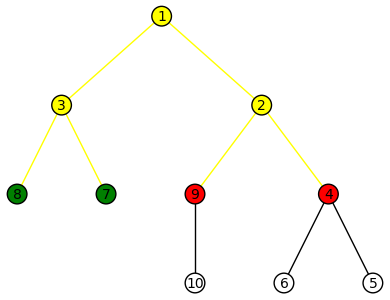

In [51]:
G_instruction_example = Graph([(1, 2), (1, 3), (2, 4), (4, 5), (4, 6), (3, 7), (3, 8), (2, 9), (9, 10)])
T = Graph([(1, 2), (1, 3), (2, 4), (3, 7), (3, 8), (2, 9)])
I = {1, 2, 3}
L = {7, 8}
B = {4, 9}
X = {5, 6, 10}
# vertex colors
vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

# edge_colors
edge_colors = {'yellow': T.edges(labels=False)}
G_instruction_example.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='tree', tree_root=1, tree_orientation="down")

### 1.2. Lemmas

#### 1.2.1. Branching Lemma
Suppose u ∈ B and there exists a k-leaf tree T' extending T where u is an internal vertex.
Then, there exists a k-leaf tree T' extending (V(T)∪N_G(u),E(T)∪{uv:v∈N_G(u)∩X}).

For example, if we choose node 4 in Graph above, here is result after execute the branching lemma.

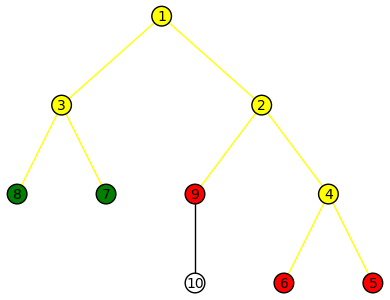

In [52]:
T = Graph([(1, 2), (1, 3), (2, 4), (3, 7), (3, 8), (2, 9), (4, 6), (4, 5)])
I = {1, 2, 3, 4}
L = {7, 8}
B = {5, 6, 9}
X = {10}
# vertex colors
vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

# edge_colors
edge_colors = {'yellow': T.edges(labels=False)}
G_instruction_example.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='tree', tree_root=1, tree_orientation="down")

#### 1.2.2. Non-extendable simplification rule

If exists v ∈ B with N_G(v) ∩ X = Ø, then move v to L.

For example, if we apply this simplification rule to the graph above, here is result.

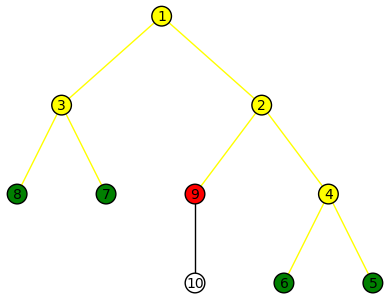

In [53]:
T = Graph([(1, 2), (1, 3), (2, 4), (3, 7), (3, 8), (2, 9), (4, 6), (4, 5)])
I = {1, 2, 3, 4}
L = {5, 6, 7, 8}
B = {9}
X = {10}
# vertex colors
vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

# edge_colors
edge_colors = {'yellow': T.edges(labels=False)}
G_instruction_example.show(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='tree', tree_root=1, tree_orientation="down")

#### 1.2.3. Follow Path Lemma
Suppose u ∈ B and |N_G(u)∩X| = 1. Let N_G(u)∩X = {v}.
If there exists a k-leaf tree extending T where u is internal, but no k-leaf tree extending T where u is a leaf, then there exists a k-leaf tree extending T where both u and v are internal.

Here is simple exmple of use of Follow Path Lemma:

In [54]:
import copy
G_instruction_example = Graph([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (7, 9)])
steps_instruction_example = []
#initial state
u = 1
T = Graph()
T.add_vertex(u)
I = set()
L = set()
B = {u}
X = set(G_instruction_example.vertices()) - {u}
neighbors_X = set(G_instruction_example.neighbors(u)) & X
#Follow Path Lemma
while len(neighbors_X) == 1:
    v = neighbors_X.pop()
    X.remove(v)
    T.add_edge(u, v)
    neighbors_X = set(G_instruction_example.neighbors(v)) & X
    u = v  # update v as new u(current vertex)
    if len(neighbors_X) == 1:
        I.add(u)
    elif len(neighbors_X) != 1:
        B.add(u)
    steps_instruction_example.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), 5])
@interact
def show_step(step=slider(0, len(steps_instruction_example)-1, 1, label="Step")):
    T, I, B, L, X, operation_type = steps_instruction_example[step]
    # vertex colors
    vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

    # edge_colors
    edge_colors = {'yellow': T.edges(labels=False)}
    
    # plot graph
    G_instruction_example_plot = G_instruction_example.plot(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='circular')
    
    show(G_instruction_example_plot)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


## 2. Branching algorithm for maximum leaf spanning tree

In [55]:
steps = []
def extend_tree(G, k, T, I, B, L, X, recall):
    #record all steps
    recall = 0
    
    # Halt - yes
    if len(L) + len(B) >= k:
        return True
    
    # Halt - No
    if len(B) == 0:
        steps[-1][5] += 1
        return False
    
    # Simplication rule：If exist v∈B with N_G(v) ∩ X = 0, then move v to L
    B_to_L = {v for v in B if not set(G.neighbors(v)) & X}
    for v in B_to_L:
        B.remove(v)
        L.add(v)
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 2])

    #Select u from B
    for u in list(B):
        
        # branch 1: try to move a vertex from B to L
        B.remove(u)
        L.add(u)  
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 3])
        if extend_tree(G, k, T, I, B, L, X, recall):
            return True
        # recall branch 1
        L.remove(u)
        B.add(u)
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 4])

        # branch 2: handle u as a internal vertex (Branching Lemma)
        original_u = u  # save the original vertex
        added_edges = []  # save added edges
        B.remove(u)
        I.add(u)
        neighbors_X = set(G.neighbors(u)) & X
        
        #Follow Path Lemma
        while len(neighbors_X) == 1:
            v = neighbors_X.pop()
            X.remove(v)
            T.add_edge(u, v)
            added_edges.append((u, v))
            neighbors_X = set(G.neighbors(v)) & X
            u = v  # update v as new u(current vertex)
            if len(neighbors_X) == 1:
                I.add(u)
            elif len(neighbors_X) != 1:
                B.add(u)
            steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 5])
        
        B.discard(u)
        # process branch 2
        for v in neighbors_X:
            T.add_edge(u, v)
            added_edges.append((u, v))
            B.add(v)
            X.remove(v)
            steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 6])
    
        if extend_tree(G, k, T, I, B, L, X, recall):
            return True
    
        # recall branch 2
        for u, v in added_edges:
            T.delete_edge((u, v))  # delete added edges
            I.discard(v)
            X.add(v)
        I.discard(original_u)  # remove original u
        B.add(original_u)  # add original u to B
        X.update(neighbors_X)  # update unused vertices to X
        for v in neighbors_X:
            B.discard(v)  # remove vertices from B
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 7])
    steps[-1][5] += 1
    return False

def max_leaf_spanning_tree(G, k):
    T = Graph()
    I = set()
    L = set()
    B = set()
    X = set(G.vertices())
    recall = 0
    # save initial state
    for r in G.vertices():
        steps.append([Graph(), set(), set(), set(), set(G.vertices()), 0, 8])
        T = Graph() #a tree in G
        T.add_vertex(r) #add initial vertex to T
        I = set()  # the internal vertices of T, with r∈I
        L = set()  # the remaining leaves of T
        B = {r}  # a subset of the leaves of T where T may be extended: the boundary set
        X = set(G.vertices()) - {r}  # the external vertices V\V(T)
        steps.append([copy.deepcopy(T), copy.deepcopy(I), copy.deepcopy(B), copy.deepcopy(L), copy.deepcopy(X), copy.deepcopy(recall), 1])
        if extend_tree(G, k, T, I, B, L, X, recall):
            return True, T
    return False, None


In [56]:
# use example
G = Graph([('a', 'b'), ('b', 'c'), ('c', 'a'), ('c', 'd'), ('d', 'e')])  
k = 3  # target least number of leaves
result, T = max_leaf_spanning_tree(G, k)
if result:
    print("Exist a spanning tree with maximum leaf number of {}.".format(k))
else:
    print("Not Exist a spanning tree with maximum leaf number of {}.".format(k))

Exist a spanning tree with maximum leaf number of 3.


## 3. Algorithm demonstration

In [57]:
@interact
def show_step(step=slider(0, len(steps)-1, 1, label="Step")):
    T, I, B, L, X, recall, operation_type = steps[step]
    # vertex colors
    vertex_colors = {'green': list(L), 'red': list(B), 'white': list(X), 'yellow': list(I)}

    # edge_colors
    edge_colors = {'yellow': T.edges(labels=False)}
    
    # plot graph
    G_plot = G.plot(vertex_colors=vertex_colors, edge_colors=edge_colors, layout='circular')
    
    # show current steps of algorithm
    
    print("The current tree T are represented in yellow, the nodes in B are in red, the nodes in L are in green,")
    print(" and the remaining unchanged parts(X) set to white.\n")
    print(f"Current state: I:{I if I else ' Null'}, B:{B if B else ' Null'}, L:{L if L else ' Null'}, X:{X if X else ' Null'}, k:{k}\n")
    
    # operation explanation
    if operation_type == 1:
        print(f"This state we choose a new vertex as a start vertex.\n")
    elif operation_type == 2:
        print(f"Simplication rule：If exist v∈B with N_G(v) ∩ X = 0, then move v to L.")
        print(f"This means all vertices in B that can not be expanded will be moved to L.\n")
    elif operation_type == 3:
        print(f"This step we go to branch 1: try to move a vertex from B to L.\n")
    elif operation_type == 4:
        print(f"Recall the branch 1 operation: move the vertex back to B.\n")
    elif operation_type == 5:
        print(f"This step will process follow path lemma.\n")
    elif operation_type == 6:
        print(f"This step we go to branch 2: handle current vertex u as a internal vertex (Branching Lemma).")
        print(f"Then, put all vertices adjacent to the current vertex u and not yet processed into set B.\n")
    elif operation_type == 7:
        print(f"Recall the branch 2 operation: Branching Lemma.\n")
    elif operation_type == 8:
        print(f"This step is initial state of the graph.\n")
    
    # recall info
    if recall == 1:
        print(f"This branch has no more leaves that may be extended, this state will recall {recall} step.\n")
    elif recall == 3:
        print(f"This initial vertex is not available, the state will recall to initial graph and choose a new initial vertex.\n")
    
    #result
    if step == len(steps)-1:
        if result:
            print(f"The number of sum of vertices in B and vertices in L has reached k:{k}.")
            print(f"YES. The branching algorithm find a maximum leaf spanning tree with at least {k} leaves.\n")
        else:
            print(f"The branching algorithm has test all viable tree, but can't reach k:{k}.")
            print(f"NO. The branching algorithm find out there is no maximum leaf spanning tree in G.\n")
    show(G_plot)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.
